In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
moviesRatings = pd.read_csv('movieReplicationSet.csv')

In [25]:
moviesRatings[list(moviesRatings.columns[:400])].isnull().sum().sum()

326586

In [26]:
moviesRatings

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [5]:
moviesRatingsCopy = moviesRatings.copy()

In [340]:
# sorted(list(moviesRatingsCopy.columns[:400]))

In [341]:
# moviesRatingsCopy.columns[80:]#'I enjoy driving fast', 'The Fast and the Furious (2001)', 'Bad Boys'
# #'Have you gambled or bet for money?' : 'The Wolf of Wall Street (2013)', 'Casino (1995)', 
# # 'Fear and Loathing in Las Vegas (1998)'

In [342]:
# moviesRatingsCopy.columns[400:]

In [6]:
moviesRatingsCopy = pd.get_dummies(moviesRatingsCopy, 
                                   columns=['Gender identity (1 = female; 2 = male; 3 = self-described)',
                                            'Are you an only child? (1: Yes; 0: No; -1: Did not respond)',
                                            'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'])

In [76]:
moviesRatingsCopy['Male'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1096 entries, 0 to 1096
Series name: Male
Non-Null Count  Dtype
--------------  -----
1096 non-null   uint8
dtypes: uint8(1)
memory usage: 9.6 KB


In [8]:
moviesRatingsCopy.drop(columns= ['Gender identity (1 = female; 2 = male; 3 = self-described)_3.0', 
                      'Are you an only child? (1: Yes; 0: No; -1: Did not respond)_-1',
                      'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_-1'], inplace=True)

In [9]:
moviesRatingsCopy.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described)_1.0,Gender identity (1 = female; 2 = male; 3 = self-described)_2.0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_1,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_0,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_1
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,5.0,1.0,1,0,1,0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,3.0,2.0,1,0,1,0,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,4.0,4.0,1,0,0,1,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,4.0,5.0,3.0,1.0,1,0,1,0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,5.0,6.0,4.0,4.0,1,0,0,1,0,1


In [10]:
moviesRatingsCopy['mean'] = moviesRatingsCopy.drop(list(moviesRatingsCopy.columns[400:]), axis=1).mean(axis=1)
moviesRatingsCopy.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described)_1.0,Gender identity (1 = female; 2 = male; 3 = self-described)_2.0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_1,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_0,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_1,mean
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,5.0,5.0,1.0,1,0,1,0,0,1,2.742857
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,3.0,2.0,1,0,1,0,1,0,2.727273
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,4.0,1,0,0,1,1,0,3.314815
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,5.0,3.0,1.0,1,0,1,0,0,1,2.414634
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,6.0,4.0,4.0,1,0,0,1,0,1,2.266949


In [11]:
#Imputation
for col in moviesRatingsCopy.columns[:400]:
    colMean = moviesRatingsCopy[col].mean()
    moviesRatingsCopy[col].loc[896] = colMean
    for i in range(len(moviesRatingsCopy[col])):
        if np.isnan(moviesRatingsCopy[col].loc[i]):
            rowMean = moviesRatingsCopy['mean'].loc[i]
            moviesRatingsCopy[col].loc[i] = (colMean + rowMean)/2

moviesRatingsCopy.isnull().sum()[:400].sum()

/var/folders/rh/n2cbgqsn1lg3d9yst_p78zxr0000gn/T/ipykernel_16945/1646552526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesRatingsCopy[col].loc[896] = colMean
/var/folders/rh/n2cbgqsn1lg3d9yst_p78zxr0000gn/T/ipykernel_16945/1646552526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviesRatingsCopy[col].loc[i] = (colMean + rowMean)/2


0

In [15]:
moviesRatingsCopy.drop(index=896, inplace=True)

In [27]:
#moviesRatingsCopy.drop('mean', axis=1, inplace=True)
moviesRatingsCopy

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described)_1.0,Gender identity (1 = female; 2 = male; 3 = self-described)_2.0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_0,Are you an only child? (1: Yes; 0: No; -1: Did not respond)_1,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_0,Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_1,mean
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,5.0,5.0,1.0,1,0,1,0,0,1,2.742857
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,5.0,3.0,2.0,1,0,1,0,1,0,2.727273
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,4.0,1,0,0,1,1,0,3.314815
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,5.0,3.0,1.0,1,0,1,0,0,1,2.414634
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,6.0,4.0,4.0,1,0,0,1,0,1,2.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,5.0,4.0,4.0,1,0,1,0,1,0,3.200000
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,6.0,5.0,1,0,1,0,1,0,3.673669
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,4.0,2.0,1,0,1,0,1,0,3.132530
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.0,3.0,1.0,1,0,1,0,0,1,3.390625


In [28]:
ratings = moviesRatingsCopy.drop(columns=moviesRatingsCopy.columns[400:]) 
ratings.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456


Part 1

In [29]:
goodPredictors = []
goodCODs = []
# avgCODs = []
for yMovie in ratings.columns:
    goodPredictor = ''
    goodCOD = -100
#     sumCOD = 0
    for xMovie in ratings.drop(yMovie, axis=1).columns:
        x = ratings[xMovie].values.reshape(-1, 1)
        y = ratings[yMovie].values
        reg = LinearRegression().fit(x, y)
        y_hat = reg.predict(x)
        r2 = r2_score(y, y_hat) #force_finite to False to prevent this fix
#         sumCOD += r2
        if r2 > goodCOD:
            goodCOD = r2
            goodPredictor = xMovie
#     avgCODs.append(sumCOD/399)
    goodCODs.append(goodCOD)
    goodPredictors.append(goodPredictor)

Text(0, 0.5, 'Number of movies')

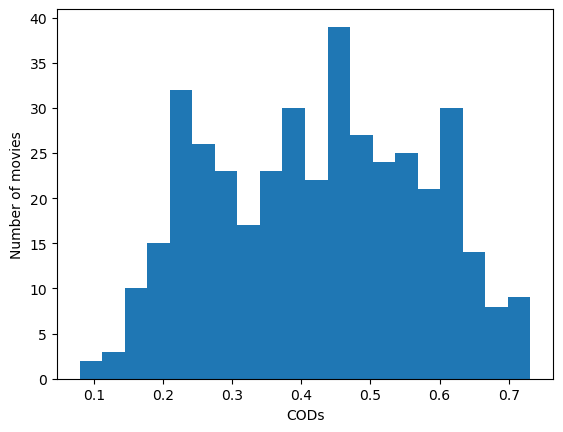

In [34]:
averageCODs = sum(goodCODs)/len(goodCODs)
# print(averageCODs)
plt.hist(goodCODs, bins=20)
plt.xlabel("CODs")
plt.ylabel("Number of movies")

In [32]:
from tabulate import tabulate
df = pd.DataFrame(list(zip(goodCODs, moviesRatingsCopy.columns, goodPredictors)))#, avgCODs
df.rename(columns = {0:'Best CODs', 1:'Movie y', 2:'X - The Best Predictor of y'}, #, 3:'Average CODs'
            inplace = True)
df = df.sort_values('Best CODs')#Don't change this
df = df.reset_index(drop=True)
print(tabulate(df[:9], headers = 'keys', tablefmt = 'psql'))
print(tabulate(df.loc[390:], headers = 'keys', tablefmt = 'psql'))

+----+-------------+---------------------------------+-------------------------------------------+
|    |   Best CODs | Movie y                         | X - The Best Predictor of y               |
|----+-------------+---------------------------------+-------------------------------------------|
|  0 |   0.0794847 | Avatar (2009)                   | Bad Boys (1995)                           |
|  1 |   0.111343  | Interstellar (2014)             | Torque (2004)                             |
|  2 |   0.11708   | Black Swan (2010)               | Sorority Boys (2002)                      |
|  3 |   0.141426  | Clueless (1995)                 | Escape from LA (1996)                     |
|  4 |   0.143887  | The Cabin in the Woods (2012)   | The Evil Dead (1981)                      |
|  5 |   0.148514  | La La Land (2016)               | The Lookout (2007)                        |
|  6 |   0.154136  | Titanic (1997)                  | Cocktail (1988)                           |
|  7 |   0

In [35]:
df_simpleOLS = pd.concat([df.loc[:9], df.loc[390:]], ignore_index=True)
moviePairs = {}
for i in range(20):
    moviePairs[df_simpleOLS.iloc[i]['Movie y']] = df_simpleOLS.iloc[i]['X - The Best Predictor of y']
moviePairs

{'Avatar (2009)': 'Bad Boys (1995)',
 'Interstellar (2014)': 'Torque (2004)',
 'Black Swan (2010)': 'Sorority Boys (2002)',
 'Clueless (1995)': 'Escape from LA (1996)',
 'The Cabin in the Woods (2012)': 'The Evil Dead (1981)',
 'La La Land (2016)': 'The Lookout (2007)',
 'Titanic (1997)': 'Cocktail (1988)',
 '13 Going on 30 (2004)': "Can't Hardly Wait (1998)",
 'The Fast and the Furious (2001)': 'Terminator 3: Rise of the Machines (2003)',
 'Grown Ups 2 (2013)': 'The Core (2003)',
 'Heavy Traffic (1973)': 'Ran (1985)',
 'The Final Conflict (1981)': 'The Lookout (2007)',
 'Congo (1995)': 'The Straight Story (1999)',
 'The Straight Story (1999)': 'Congo (1995)',
 'The Bandit (1996)': 'Best Laid Plans (1999)',
 'Best Laid Plans (1999)': 'The Bandit (1996)',
 'Patton (1970)': 'The Lookout (2007)',
 'The Lookout (2007)': 'Patton (1970)',
 'I.Q. (1994)': 'Erik the Viking (1989)',
 'Erik the Viking (1989)': 'I.Q. (1994)'}

Part 2

In [36]:
moviesRatingsCopy.rename(columns={"Gender identity (1 = female; 2 = male; 3 = self-described)_1.0": "Female",
                                  "Gender identity (1 = female; 2 = male; 3 = self-described)_2.0": "Male",
                                  "Are you an only child? (1: Yes; 0: No; -1: Did not respond)_0": "Has Siblings",
                                 'Are you an only child? (1: Yes; 0: No; -1: Did not respond)_1':'Only Child',
                                'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_0':
                                  'Enjoy with company',
                                'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)_1':'Enjoy alone'},
                        inplace=True)   

In [38]:
moviesRatingsCopy

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Female,Male,Has Siblings,Only Child,Enjoy with company,Enjoy alone,mean
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,5.0,5.0,1.0,1,0,1,0,0,1,2.742857
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,5.0,3.0,2.0,1,0,1,0,1,0,2.727273
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,4.0,1,0,0,1,1,0,3.314815
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,5.0,3.0,1.0,1,0,1,0,0,1,2.414634
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,6.0,4.0,4.0,1,0,0,1,0,1,2.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,5.0,4.0,4.0,1,0,1,0,1,0,3.200000
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,6.0,5.0,1,0,1,0,1,0,3.673669
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,4.0,2.0,1,0,1,0,1,0,3.132530
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.0,3.0,1.0,1,0,1,0,0,1,3.390625


In [39]:
yMovies = []
xMovies = []
cod =[]
for (yMovie, xMovie) in moviePairs.items():
    print(yMovie, xMovie)
    yMovies.append(yMovie)
    xMovies.append(xMovie)
    df_temp = moviesRatingsCopy[[yMovie, xMovie, 'Female', 'Male', 'Has Siblings', 'Only Child', 
                                 'Enjoy with company', 'Enjoy alone']]
    y = df_temp[yMovie].values
    X = df_temp.drop(yMovie, axis=1).values
    reg = LinearRegression().fit(X,y)
    y_hat = reg.predict(X)
    r2 = r2_score(y, y_hat)
    cod.append(r2)

Avatar (2009) Bad Boys (1995)
Interstellar (2014) Torque (2004)
Black Swan (2010) Sorority Boys (2002)
Clueless (1995) Escape from LA (1996)
The Cabin in the Woods (2012) The Evil Dead (1981)
La La Land (2016) The Lookout (2007)
Titanic (1997) Cocktail (1988)
13 Going on 30 (2004) Can't Hardly Wait (1998)
The Fast and the Furious (2001) Terminator 3: Rise of the Machines (2003)
Grown Ups 2 (2013) The Core (2003)
Heavy Traffic (1973) Ran (1985)
The Final Conflict (1981) The Lookout (2007)
Congo (1995) The Straight Story (1999)
The Straight Story (1999) Congo (1995)
The Bandit (1996) Best Laid Plans (1999)
Best Laid Plans (1999) The Bandit (1996)
Patton (1970) The Lookout (2007)
The Lookout (2007) Patton (1970)
I.Q. (1994) Erik the Viking (1989)
Erik the Viking (1989) I.Q. (1994)


In [51]:
df_multiLS = pd.DataFrame(list(zip(cod, yMovies, xMovies)))
df_multiLS.rename(columns = {0:'CODs of Multi Regression', 1:'Movie y', 2:'X - Predictor of y'}, 
            inplace = True)

In [55]:
df_multiLS['Simple regression CODs'] = df_simpleOLS['Best CODs']

In [60]:
# print(df_multiLS)
# print(df_simpleOLS)
print(tabulate(df_multiLS, headers = ['New CODs','y', 'X', 'COD' ], 
               tablefmt = 'psql'))

+----+------------+---------------------------------+-------------------------------------------+-----------+
|    |   New CODs | y                               | X                                         |       COD |
|----+------------+---------------------------------+-------------------------------------------+-----------|
|  0 |  0.0822072 | Avatar (2009)                   | Bad Boys (1995)                           | 0.0794847 |
|  1 |  0.118622  | Interstellar (2014)             | Torque (2004)                             | 0.111343  |
|  2 |  0.123109  | Black Swan (2010)               | Sorority Boys (2002)                      | 0.11708   |
|  3 |  0.149018  | Clueless (1995)                 | Escape from LA (1996)                     | 0.141426  |
|  4 |  0.159031  | The Cabin in the Woods (2012)   | The Evil Dead (1981)                      | 0.143887  |
|  5 |  0.155394  | La La Land (2016)               | The Lookout (2007)                        | 0.148514  |
|  6 |  0.

Text(0, 0.5, 'Multiple Regression Model CODS')

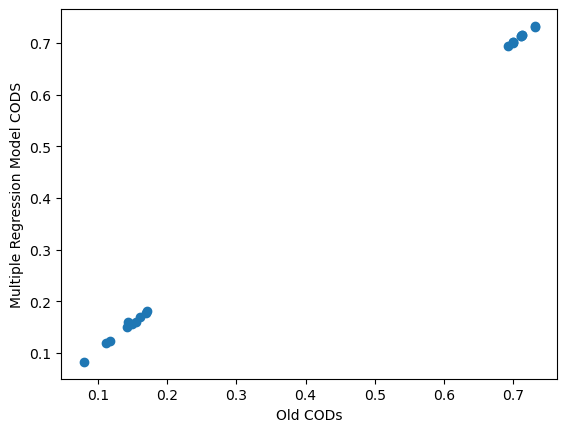

In [64]:
plt.scatter(df_simpleOLS['Best CODs'].values, df_multiLS['CODs of Multi Regression'].values)
plt.xlabel("Old CODs")
plt.ylabel("Multiple Regression Model CODS")

Part 3 and 4

In [67]:
d = df.groupby('X - The Best Predictor of y').count() #'Best CODs', 1:'Movie y', 2:'X - The Best Predictor of y'
allPurposePredictors = d[d['Movie y'] > 1].sort_values('Movie y', ascending=False)[:30].index.tolist() 
#chose these coz they were best X for many ys
moviePairs = {}
for i in range(30):
    moviePairs[df.iloc[10+i]['Movie y']] = df.iloc[10+i]['X - The Best Predictor of y']
predictorMovies = []
for i in allPurposePredictors:
    if i not in moviePairs.keys():
        predictorMovies.append(i)
print(predictorMovies)

['The Lookout (2007)', 'Sexy Beast (2000)', 'Erik the Viking (1989)', 'Crimson Tide (1995)', 'Escape from LA (1996)', "Miller's Crossing (1990)", 'The Bandit (1996)', 'FeardotCom (2002)', 'The King of Marvin Gardens (1972)', 'What Lies Beneath (2000)', 'The Final Conflict (1981)', 'The Straight Story (1999)', 'The 51st State (2001)', 'Patton (1970)', 'I.Q. (1994)', 'Change of Habit (1969)', 'Boomerang (1992)', 'Stir Crazy (1980)', 'Pieces of April (2003)', 'Unforgiven (1992)', 'Heavy Traffic (1973)', 'Slackers (2002)', 'Brazil (1985)', 'The Deer Hunter (1978)', 'Best Laid Plans (1999)', 'De-Lovely (2004)', 'MacArthur (1977)', 'Tropic of Cancer (1970)', 'The Firm (1993)', 'The Station Agent (2003)']


In [70]:
#Ridge
yMovies = []
ridgeAlpha = []
ridgeRmseVals = []
for (yMovie, xMovie) in moviePairs.items():
    yMovies.append(yMovie)
    xMovies.append(xMovie)
    y = ratings[yMovie].values
    X = ratings[predictorMovies[:10]].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)               
    alphas= {'alpha':[2.0**c for c in np.arange(-10, 10)]}
    ridgeEstimator = Ridge()
    rm = GridSearchCV(ridgeEstimator, alphas, cv=5) #cv int for k stratified folds
    #if you want to add this param, for ridge and lasso, default score is r^2
    rm.fit(Xtrain, ytrain)
    ridgeAlpha.append(rm.best_params_['alpha'])
    reg = Ridge(alpha = rm.best_params_['alpha'])
    reg.fit(Xtrain, ytrain)
    yhat = reg.predict(Xtest)
    currentMSE = mean_squared_error(ytest, yhat)
    currentRMSE = np.sqrt(currentMSE)
    ridgeRmseVals.append(currentRMSE)
#     print(yMovie, 'RMSE:', currentRMSE, "Alpha:", rm.best_params_['alpha'], '\n', "Betas:", reg.coef_, '\n')

In [69]:
moviePairs

{'The Wolf of Wall Street (2013)': 'As Good as it Gets (1997)',
 'The Silence of the Lambs (1991)': 'The Shining (1980)',
 'Inception (2010)': 'The Game (1997)',
 'Forrest Gump (1994)': 'Rain Man (1988)',
 'Spider-Man (2002)': 'Batman (1989)',
 'Bad Teacher (2011)': 'Hollow Man (2000)',
 'Back to the Future (1985)': 'The 51st State (2001)',
 'Shutter Island (2010)': "Miller's Crossing (1990)",
 'Fight Club (1999)': 'Snatch (2000)',
 'The Proposal (2009)': 'The Vow (2012)',
 'The Vow (2012)': 'The Proposal (2009)',
 'Ice Age (2002)': 'On Golden Pond (1981)',
 'Mission: Impossible II (2000)': 'Boomerang (1992)',
 'Planet of the Apes (2001)': 'Equilibrium (2002)',
 'The Jungle Book (1967)': 'Tarzan (1999)',
 'Ghostbusters (2016)': 'The Doom Generation (1995)',
 'The Exorcist (1973)': 'The Conjuring (2013)',
 'The Conjuring (2013)': 'The Exorcist (1973)',
 'Elf (2003)': 'The Doom Generation (1995)',
 'Batman: The Dark Knight (2008)': 'Crimson Tide (1995)',
 'Scary Movie (2000)': 'Hollow Ma

In [71]:
#Lasso
lassoAlpha = []
lassoRmseVals = []
for (yMovie, xMovie) in moviePairs.items():
    y = ratings[yMovie].values
    X = ratings[predictorMovies[:10]].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=3)              
    alphas={'alpha':[2.0**c for c in np.arange(-10, 10)]}
    lassoEstimator = Lasso()
    rm = GridSearchCV(lassoEstimator, alphas, cv=5)
    rm.fit(Xtrain, ytrain)
    lassoAlpha.append(rm.best_params_['alpha'])
    reg = Lasso(alpha = rm.best_params_['alpha'])
    reg.fit(Xtrain, ytrain)
    yhat = reg.predict(Xtest)
    currentMSE = mean_squared_error(ytest, yhat)
    currentRMSE = np.sqrt(currentMSE)
    lassoRmseVals.append(currentRMSE)
#     print(yMovie, 'RMSE:', currentRMSE, "Alpha:", rm.best_params_['alpha'], '\n', "Betas:", reg.coef_, '\n')

In [72]:
df_4 = pd.DataFrame(list(zip(yMovies, lassoAlpha, lassoRmseVals, ridgeAlpha, ridgeRmseVals)))
df_4.rename(columns = {0:'y', 1:'Lasso Alpha', 2:'Lasso RMSE', 3:'Ridge Alpha', 4:'Ridge RMSE'}, 
            inplace = True)

In [73]:
df_4

,y,Lasso Alpha,Lasso RMSE,Ridge Alpha,Ridge RMSE
0,The Wolf of Wall Street (2013),0.015625,0.697529,128.0,0.693591
1,The Silence of the Lambs (1991),0.015625,0.661497,128.0,0.650036
2,Inception (2010),0.015625,0.611740,128.0,0.606978
3,Forrest Gump (1994),0.007812,0.589675,64.0,0.584601
4,Spider-Man (2002),0.015625,0.716084,64.0,0.704510
5,Bad Teacher (2011),0.015625,0.600963,128.0,0.597228
6,Back to the Future (1985),0.003906,0.608806,64.0,0.612212
7,Shutter Island (2010),0.015625,0.462307,256.0,0.466425
8,Fight Club (1999),0.007812,0.471168,64.0,0.469714
9,The Proposal (2009),0.015625,0.559764,32.0,0.556145


Part 5

In [82]:
moviesRatings.drop(list(moviesRatings.columns[400:]), axis=1, inplace = True)

In [83]:
moviesRatings['mean'] = moviesRatings.mean(axis=1)
x = moviesRatings['mean'].drop(index = 896).values

In [85]:
fourMovies = dict(moviesRatings.drop('mean', axis=1).mean())
fourMovies = sorted(fourMovies.items(), key=lambda x:x[1])
fourMovies = fourMovies[199:203]
fourMovies

[('Happy Gilmore (1996)', 2.581168831168831),
 ('Diamonds are Forever (1971)', 2.5826771653543306),
 ('Scream (1996)', 2.5842696629213484),
 ('Man on Fire (2004)', 2.585714285714286)]

Happy Gilmore (1996)
Beta: [[5.43811337]]
Params {'C': 10}
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       103
           1       0.91      0.93      0.92       117

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220



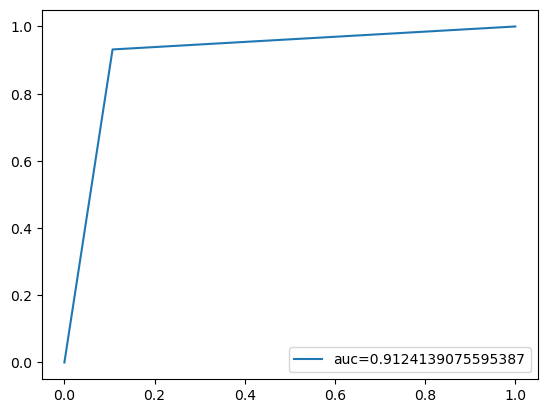

Diamonds are Forever (1971)
Beta: [[8.45520834]]
Params {'C': 10}
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.98      0.97      0.97       120

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220



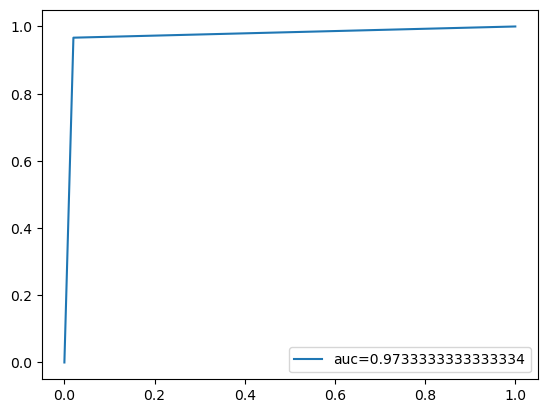

Scream (1996)
Beta: [[0.8427261]]
Params {'C': 0.01}
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       101
           1       0.88      0.89      0.89       119

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



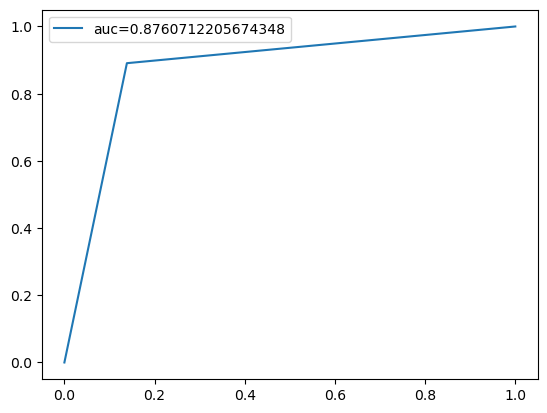

Man on Fire (2004)
Beta: [[7.75931281]]
Params {'C': 10}
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       104
           1       0.94      0.97      0.96       116

    accuracy                           0.95       220
   macro avg       0.96      0.95      0.95       220
weighted avg       0.96      0.95      0.95       220



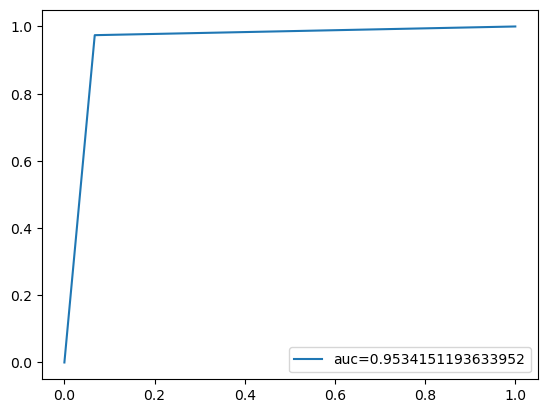

In [91]:
for i in range(len(fourMovies)):
    yMovie = fourMovies[i][0]
    print(yMovie)
    y = ratings[yMovie].values
    med = np.median(y)
    y = np.where(y>med, 1, 0)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
    logisRegGCV = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
    logisRegGCV.fit(xtrain.reshape(-1, 1), ytrain)
    lr = LogisticRegression(C = logisRegGCV.best_params_['C'])
    lr.fit(xtrain.reshape(-1, 1), ytrain)
    print("Beta:", lr.coef_)
    print("Params", logisRegGCV.best_params_)
    pred = lr.predict(xtest.reshape(-1, 1))
    print(classification_report(ytest, pred))
    score = lr.score(xtest.reshape(-1, 1), ytest)
#     print(score)
    fpr, tpr, _ = roc_curve(ytest, pred)
#     print(fpr, tpr, _)
    auc = roc_auc_score(ytest, pred)
    plt.plot(fpr, tpr, label = "auc="+str(auc))
    plt.legend()
    plt.show()

Extre Credit

The Life of David Gale (2003)
Wing Commander (1999)
Django Unchained (2012)
Alien (1979)
Indiana Jones and the Last Crusade (1989)
Snatch (2000)
Rambo: First Blood Part II (1985)
Fargo (1996)
Let the Right One In (2008)
Black Swan (2010)
King Kong (1976)
The Machinist (2004)
A Nightmare on Elm Street (1984)
Brazil (1985)
The Fast and the Furious (2001)
Change of Habit (1969)
American Beauty (1999)
Psycho (1960)
Terminator 3: Rise of the Machines (2003)
Night of the Living Dead (1968)
Man on Fire (2004)
Star Wars: Episode IV - A New Hope (1977)
The Silence of the Lambs (1991)
The Others (2001)
Minority Report (2002)
Sling Blade (1996)
Schindler's List (1993)
3000 Miles to Graceland (2001)
Magnolia (1999)
The Karate Kid Part II (1986)
Planet of the Apes (2001)
The Godfather: Part II (1974)
Indiana Jones and the Temple of Doom (1984)
Indiana Jones and the Raiders of the Lost Ark (1981)
The Iron Giant (1999)
The Matrix Revolutions (2003)
North (1994)
The Lost World: Jurassic Park (1997)
Th

Along Came a Spider (2002)
The Mist (2007)
Aladdin (1992)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
Men in Black (1997)
Eternal Sunshine of the Spotless Mind (2004)
Ocean's Eleven (2001)
Men in Black II (2002)
Cocktail (1988)
The Wolf of Wall Street (2013)
The Game (1997)
Red Sonja (1985)
One Flew Over the Cuckoo's Nest (1975)
Freddy Got Fingered (2001)
The Village (2004)
Miller's Crossing (1990)
My Best Friend's Wedding (1997)
Iron Man 3 (2013)
Big Daddy (1999)
Suspiria (1977)
The Passenger (1975)
The Station Agent (2003)
Jurassic Park (1993)
Captain America: Civil War (2016)
A Perfect Murder (1998)
Analyze That (2002)
Braveheart (1995)
Inception (2010)
Groundhog Day (1993)
The Lookout (2007)
21 Grams (2003)
Gladiator (2000)
Midnight Cowboy (1969)
Fatal Attraction (1987)
House of Sand and Fog (2003)
On Golden Pond (1981)
The Mummy (1999)
The Descent (2005)
Runaway Bride (1999)
Harry Potter and the Goblet of Fire (2005)
Gods and Generals (2003)
My Father and My Son 

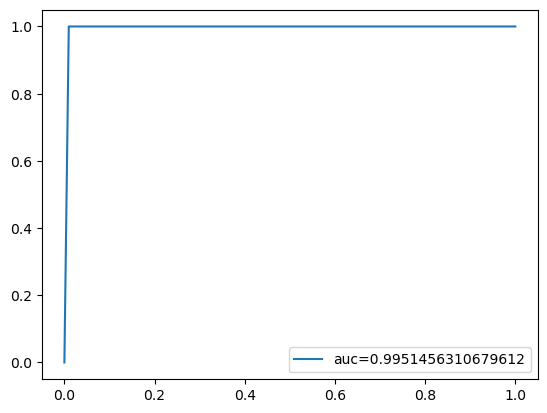

In [95]:
easyMovie = ''
bestAUC = 0
bestfpr = 0
bestbetas = 0
besttpr = 0
for yMovie in moviesRatings.columns[:400]:
    print(yMovie)
    y = ratings[yMovie].values
    med = np.median(y)
    y = np.where(y>med, 1, 0)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)
    parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100] }
    logisRegGCV = GridSearchCV(LogisticRegression(), param_grid = parameters, cv = 5)
    logisRegGCV.fit(xtrain.reshape(-1, 1), ytrain)
    lr = LogisticRegression(C = logisRegGCV.best_params_['C'])
    lr.fit(xtrain.reshape(-1, 1), ytrain)
#     print("Beta:", lr.coef_)
#     print("Params", logisRegGCV.best_params_)
    pred = lr.predict(xtest.reshape(-1, 1))
#     print(classification_report(ytest, pred))
    score = lr.score(xtest.reshape(-1, 1), ytest)
    fpr, tpr, _ = roc_curve(ytest, pred)
    auc = roc_auc_score(ytest, pred)
    if auc > bestAUC:
        bestAUC = auc
        easyMovie = yMovie
        besttpr = tpr
        bestfpr = fpr
        bestbetas = lr.coef_
    
plt.plot(bestfpr, besttpr, label = "auc="+str(bestAUC))
plt.legend()
plt.show()

In [96]:
print(easyMovie, 
bestAUC, 
bestfpr, 
bestbetas, 
besttpr)

Hollow Man (2000) 0.9951456310679612 [0.         0.00970874 1.        ] [[14.95076714]] [0. 1. 1.]


In [97]:
moviesRatingsCopy.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Female,Male,Has Siblings,Only Child,Enjoy with company,Enjoy alone,mean
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,5.0,5.0,1.0,1,0,1,0,0,1,2.742857
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,5.0,3.0,2.0,1,0,1,0,1,0,2.727273
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,4.0,1,0,0,1,1,0,3.314815
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,5.0,3.0,1.0,1,0,1,0,0,1,2.414634
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,6.0,4.0,4.0,1,0,0,1,0,1,2.266949


In [116]:
df_extra = moviesRatingsCopy[['Have you gambled or bet for money?', 'The Wolf of Wall Street (2013)'
                             ]].dropna()
#                   ,'Goodfellas (1990)', 'Casino (1995)', 'Fear and Loathing in Las Vegas (1998)'
#                ,'As Good as it Gets (1997)']].dropna()
df_extra.head()


,Have you gambled or bet for money?,The Wolf of Wall Street (2013)
0,2.0,2.922403
1,1.0,2.914611
2,1.0,3.208382
3,1.0,4.000000
4,4.0,3.000000


In [117]:
y = df_extra['Have you gambled or bet for money?'].values
X = df_extra.drop('Have you gambled or bet for money?', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


reg = LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)

r_squared = reg.score(X, y)
print(r_squared, reg.coef_)

MSE = mean_squared_error(y_test, y_hat)
RMSE = np.sqrt(currentMSE)
print(RMSE)


0.0016383267603001794 [0.09071138]
0.5410915677521211


Beta: [[0.31673739]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       176
           1       0.00      0.00      0.00        43

    accuracy                           0.80       219
   macro avg       0.40      0.50      0.45       219
weighted avg       0.65      0.80      0.72       219

0.8036529680365296
[0. 1.] [0. 1.] [1 0]


/Users/shreemayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreemayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreemayi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


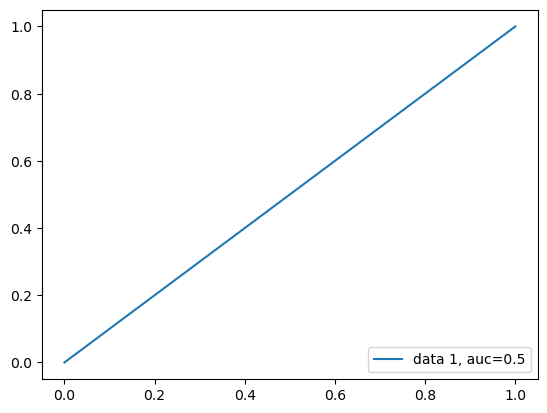

In [118]:
y = np.where(y>=4, 1, 0) #np.median(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
logisReg = LogisticRegression()
logisReg.fit(X_train, y_train)
print("Beta:", logisReg.coef_)
pred = logisReg.predict(X_test)
print(classification_report(y_test, pred))
score = logisReg.score(X_test, y_test)
print(score)
fpr, tpr, _ = roc_curve(y_test, pred)
print(fpr, tpr, _)
auc = roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:

moviesRatingsCopy.head()